# Introduction 

This is a colab or jupyter notebook to host my implementation of a real time sign language detector for the purposes of my summer internship in Sense Space Informatics.

# 1) Download and Import useful libraries.

In [2]:
!python -m pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2) Visualizing Keypoints using MP Holistic

Media Pipe can be used to find keypoints from the face, hands and body posture. It will be usefull in order to extract information from the videos.

In [4]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [29]:
def mediapipe_detection(image, model):
   
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 

    return image, results

In [6]:
def draw_landmarks(image, results):

  # Draw face connections
  mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
  # Draw pose connections 
  mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
  # Draw left hand connections
  mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
  # Draw right hand connections
  mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    
def style_landamrks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [42]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        style_landamrks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
style_landamrks(frame, results)

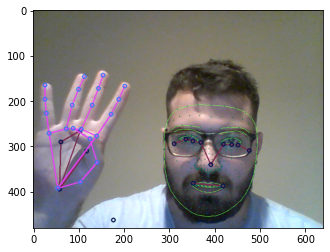

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3) Extract values from hands, pose, face

In [ ]:
results.right_hand_landmarks.landmark


[x: 0.08440174907445908
y: 0.8168660998344421
z: -0.00011790097778430209
, x: 0.16280721127986908
y: 0.7881616950035095
z: -0.05446469783782959
, x: 0.22153501212596893
y: 0.6980184316635132
z: -0.08394920080900192
, x: 0.19625866413116455
y: 0.5906071662902832
z: -0.10666729509830475
, x: 0.1390586495399475
y: 0.5434805750846863
z: -0.11952846497297287
, x: 0.22007685899734497
y: 0.5790504813194275
z: -0.02609541453421116
, x: 0.2696661651134491
y: 0.4771445095539093
z: -0.04893295466899872
, x: 0.2960318326950073
y: 0.40906620025634766
z: -0.053977787494659424
, x: 0.3166685700416565
y: 0.3496871590614319
z: -0.05466620251536369
, x: 0.16685661673545837
y: 0.5471693277359009
z: -0.02374277077615261
, x: 0.20408418774604797
y: 0.4362977147102356
z: -0.031755756586790085
, x: 0.2260637879371643
y: 0.35856062173843384
z: -0.046190500259399414
, x: 0.24208249151706696
y: 0.2992951571941376
z: -0.061691392213106155
, x: 0.11442036181688309
y: 0.545070230960846
z: -0.03197093680500984
, x:

In [7]:
dim1 = 3
dim2 = 4
# print(len(results.face_landmarks.landmark))

In [8]:
def extract_keypoints(results):
    
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*dim2)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*dim1)
    l_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*dim1)
    r_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*dim1)
    
    return np.concatenate([pose, face, l_hand, r_hand])

In [ ]:
test = extract_keypoints(results)

In [ ]:
test

array([ 0.44545522,  0.65494609, -2.22760725, ...,  0.        ,
        0.        ,  0.        ])

# 4) Data collection

In [9]:
path = os.getcwd()
print(path)
# path for exported data, numpy arrays
DATA_PATH = os.path.join(path, 'data') 
print(DATA_PATH)

# weather phenomens that we try to detect
actions = np.array(['vrochi', 'aeras', 'astrapi', 'zesth', 'ilioloustos', 'chioni'])

# 10 videos worth of data
num_sequences = 10

# videos are going to be 30 frames in length
sequence_length = 30

# folder start
start_folder = 30

C:\Users\user\Desktop\GitHub\sign-language-translation
C:\Users\user\Desktop\GitHub\sign-language-translation\data


In [ ]:
for action in actions: 
    for sequence in range(num_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # for every phenomenon
    for action in actions:
        
        # loop through sequences
        for sequence in range(num_sequences):
            
            # loop through sequence length
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                # detect
                image, results = mediapipe_detection(frame, holistic)

                # draw
                style_landamrks(image, results)
                
                # wait for next try
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 5) Split Training and Testing Data

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
label_map = {label:num for num, label in enumerate(actions)}

In [12]:
label_map

{'vrochi': 0,
 'aeras': 1,
 'astrapi': 2,
 'zesth': 3,
 'ilioloustos': 4,
 'chioni': 5}

In [13]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(60, 30, 1662)

In [14]:
np.array(labels).shape

(60,)

In [14]:
X = np.array(sequences)
X.shape

(60, 30, 1662)

In [15]:
y = to_categorical(labels).astype(int)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [17]:
y_test.shape

(9, 6)

# 6) Build LSTM with Keras

In [22]:
!nvidia-smi

Thu Jul  8 21:47:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [142]:
log_dir = os.path.join('Logs1')
tb_callback = TensorBoard(log_dir=log_dir)

AlreadyExistsError: Another profiler is running.

In [141]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [137]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [138]:
model.fit(X_train, y_train, epochs=2000, steps_per_epoch=1800, callbacks=[tb_callback])

Epoch 1/2000
   1/1800 [..............................] - ETA: 2:04:27 - loss: 1.9039 - categorical_accuracy: 0.0000e+00

AlreadyExistsError: Another profiler is running.

In [21]:
model.load_weights('action1.h5')

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 198       
Total params: 596,774
Trainable params: 596,774
Non-trainable params: 0
________________________________________________

In [53]:
model.save_weights('action1.h5')

# 7) Testing and metrics

In [127]:
res = model.predict(X_test)

In [128]:
actions[np.argmax(res[4])]

'vrochi'

In [129]:
actions[np.argmax(y_test[4])]

'zesth'

In [130]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [131]:
yhat = model.predict(X_test)

In [132]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [133]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 2],
        [0, 1]],

       [[7, 0],
        [1, 1]],

       [[8, 0],
        [0, 1]],

       [[6, 0],
        [2, 1]],

       [[6, 1],
        [1, 1]],

       [[8, 1],
        [0, 0]]], dtype=int64)

In [134]:
accuracy_score(ytrue, yhat)

0.5555555555555556

# 8) Real time detections

In [76]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        
        #d Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        style_landamrks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ilioloustos
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ilioloustos
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ilioloustos
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ilioloustos
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.so

<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
zesth
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ilioloustos
<class 'mediapipe.python.solution_base.SolutionOutputs'>
ilioloustos
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
astrapi
<class 'mediapipe.pytho

<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
vrochi
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.SolutionOutputs'>
chioni
<class 'mediapipe.python.solution_base.S

In [77]:
cap.release()
cv2.destroyAllWindows()